In [1]:
%gui qt5

from ib_insync import *
util.useQt()

ib = IB()
ib.connect('127.0.0.1', 7497, clientId=14)

Earliest date of available bar data:

In [2]:
contract = Stock('TSLA', 'SMART', 'USD')

ib.reqHeadTimeStamp(contract, whatToShow='TRADES', useRTH=True)

datetime.datetime(2010, 6, 29, 8, 0)

To request hourly data of the last 60 trading days:

In [3]:
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='60 D',
        barSizeSetting='1 hour',
        whatToShow='TRADES',
        useRTH=True,
        formatDate=1)

In [4]:
bars[0]

BarData(date=datetime.datetime(2017, 5, 2, 15, 30), open=324.01, high=327.66, low=320.3, close=320.84, volume=12410, barCount=6414, average=323.397)

In [5]:
df = util.df(bars)

display(df.head())
display(df.tail())

,date,open,high,low,close,volume,barCount,average
0,2017-05-02 15:30:00,324.01,327.66,320.30,320.84,12410,6414,323.397
1,2017-05-02 16:00:00,320.89,321.60,319.00,320.42,10535,6030,320.337
2,2017-05-02 17:00:00,320.46,322.26,320.32,321.24,4484,2566,321.325
3,2017-05-02 18:00:00,321.16,321.96,320.61,321.09,2567,1475,321.333
4,2017-05-02 19:00:00,321.17,321.58,320.07,320.16,1841,1124,320.873


,date,open,high,low,close,volume,barCount,average
410,2017-07-26 15:30:00,340.36,342.26,338.12,341.10,7284,3616,340.447
411,2017-07-26 16:00:00,341.25,344.47,340.91,342.90,10919,5091,342.926
412,2017-07-26 17:00:00,342.99,345.50,342.56,342.98,6976,3296,344.190
413,2017-07-26 18:00:00,342.99,344.29,342.83,343.94,2370,1237,343.798
414,2017-07-26 19:00:00,343.93,345.24,343.55,344.43,2750,1488,344.504


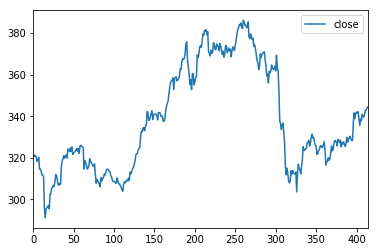

In [8]:
%matplotlib inline

df.plot(y='close')